# ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

In [1]:
import os

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Configurações para os plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


Carregando os dados

In [2]:
# URLs dos arquivos de dados brutos no repositório do GitHub
train_url = 'https://raw.githubusercontent.com/Huangxiaojie2024/InterDIA/refs/heads/main/DataSet/DIA_trainingset_RDKit_descriptors.csv'
test_url = 'https://raw.githubusercontent.com/Huangxiaojie2024/InterDIA/refs/heads/main/DataSet/DIA_testset_RDKit_descriptors.csv'

# Carregando os datasets em DataFrames do pandas
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

print("Dados de treino carregados com sucesso!")
print(f"Shape do dataset de treino: {df_train.shape}")
print("\nDados de teste carregados com sucesso!")
print(f"Shape do dataset de teste: {df_test.shape}")



Dados de treino carregados com sucesso!
Shape do dataset de treino: (477, 198)

Dados de teste carregados com sucesso!
Shape do dataset de teste: (120, 198)


Verificando a estrutura dos dados

In [3]:
print("\n--- Primeiras 5 linhas do dataset de treino ---")
display(df_train.head())

print("\n\n--- Informações gerais do dataset de treino ---")
df_train.info()

print("\n\n--- Verificação de valores nulos ---")
# .sum() duas vezes para somar todos os nulos no DataFrame
print(f"Total de valores nulos no dataset de treino: {df_train.isnull().sum().sum()}")




--- Primeiras 5 linhas do dataset de treino ---


,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,...,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,...,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,...,0,0,0,0,0,0,0,0,0,0
3,1,CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,...,0,0,0,0,0,0,0,0,0,0
4,1,C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,...,0,0,0,0,0,0,0,0,0,0




--- Informações gerais do dataset de treino ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Columns: 198 entries, Label to fr_urea
dtypes: float64(83), int64(114), object(1)
memory usage: 738.0+ KB


--- Verificação de valores nulos ---
Total de valores nulos no dataset de treino: 0


In [4]:
print("\n\n--- Estatísticas descritivas ---")
display(df_train.iloc[:, 2:].describe())

# Vamos gerar um excel para melhor visualizar, pois são muitas features
df_train.iloc[:, 2:].describe().to_excel("estatisticas_descritivas.xlsx")




--- Estatísticas descritivas ---


,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,...,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.000000,477.000000
mean,2.142618,738.629776,18.130015,14.372379,14.886985,11.874170,8.433990,8.963610,6.672302,7.253495,...,0.054507,0.050314,0.014675,0.006289,0.008386,0.031447,0.0,0.027254,0.327044,0.027254
std,0.710916,392.967592,7.247300,6.093945,6.134658,4.828675,3.756045,3.813948,3.282600,3.340274,...,0.245047,0.245944,0.120375,0.079138,0.091285,0.186342,0.0,0.175409,1.372740,0.162993
min,0.986000,8.000000,3.414000,1.725000,1.725000,1.732000,0.612000,0.612000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.679000,493.255000,13.405000,10.391000,10.763000,8.724000,5.807000,6.340000,4.399000,4.931000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.964000,712.423000,17.646000,14.184000,14.683000,11.770000,8.351000,8.997000,6.362000,7.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,2.419000,943.190000,22.052000,17.730000,18.216000,14.507000,10.588000,11.128000,8.554000,9.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,5.083000,2430.934000,50.120000,38.475000,39.837000,31.516000,23.166000,24.440000,19.352000,19.615000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.0,2.000000,18.000000,1.000000


Algumas features, como VSA_EState1, VSA_EState2, VSA_EState3, VSA_EState4, VSA_EState5, VSA_EState6 e VSA_EState7 possuem mínimo e máximo igual a zero, ou seja, são séries constantes e não adicionam informação alguma. Deverão ser eliminadas.


Como não conhecemos a semântica das features, vamos analisar seus conteúdos para inferir seus tipos: Numéricas, categóricas, data, etc.

In [5]:

def guess_feature_types(df: pd.DataFrame, max_sample: int = 200_000):
    """
    Classifica automaticamente os tipos de features em um DataFrame.
        
    Analisa cada coluna do DataFrame e categoriza em um dos tipos:
    - binary: Features binárias (2 valores únicos)
    - categorical_low: Features categóricas de baixa cardinalidade (≤50 valores ou ≤5% das observações)
    - categorical_high: Features categóricas de alta cardinalidade
    - text: Features de texto livre (strings longas com espaços)
    - numeric: Features numéricas contínuas
    - datetime: Features de data/hora
    - id_like: Features que parecem identificadores únicos (alta cardinalidade, GUIDs)
    - constant: Features com valores constantes
    - unknown: Features que não se encaixam nas categorias anteriores

    Args:
        df (pd.DataFrame): DataFrame para análise
        max_sample (int): Número máximo de amostras para análise (default: 200,000)
        
    Returns:
        dict: Dicionário com listas de nomes de features por categoria
        
    
    Como usar o resultado:

        - categorical_low: OHE (RandomForest) ou categóricas nativas (CatBoost/LightGBM/XGBoost).
        - categorical_high: target/hashing (e agrupar níveis raros) ou modelos com categóricas nativas (melhor).
        - text: trate como texto (TF-IDF/embeddings), não como categórico.
        - id_like: geralmente remover (chave quase única).
        - binary: manter (com as cautelas de rareza que vimos).
        - numeric: seguir pipeline numérico (escala/transform se necessário).
        - datetime: decompôr em ano/mês/dia, recency, sazonalidade, etc.
    """

    samp = df.sample(min(len(df), max_sample), random_state=0) if len(df) > max_sample else df
    n = len(samp)
    out = {k: [] for k in ["binary","categorical_low","categorical_high","text","numeric","datetime","id_like","constant","unknown"]}

    for c in samp.columns:
        s = samp[c]
        nunique = s.nunique(dropna=True)
        if nunique <= 1:
            out["constant"].append(c); continue

        # datetime 
        if pd.api.types.is_datetime64_any_dtype(s) or (s.dtype == "object" and pd.to_datetime(s, errors="coerce", utc=True).notna().mean() > 0.8):
            out["datetime"].append(c); continue

        # booleano / binário
        if pd.api.types.is_bool_dtype(s):
            out["binary"].append(c); continue

        # numérico (checa "inteiro disfarçado" e baixa cardinalidade)
        if pd.api.types.is_numeric_dtype(s):
            s_num = pd.to_numeric(s, errors="coerce")
            if nunique == 2:
                out["binary"].append(c)
            else:
                # inteiro-like? (floats que são todos inteiros)
                s_nn = s_num.dropna()
                int_like = len(s_nn) > 0 and ((s_nn % 1).abs().max() < 1e-9)
                # baixa cardinalidade → categórico codificado como número
                low_card = nunique <= max(50, int(0.05 * n))
                if int_like and low_card:
                    out["categorical_low"].append(c)
                else:
                    out["numeric"].append(c)
            continue

        # objetos/categoria
        if s.dtype == "object" or pd.api.types.is_categorical_dtype(s):
            ur = nunique / n  # proporção de únicos
            sample_vals = s.dropna().astype(str).head(1000)
            has_guid = sample_vals.str.match(r'^[0-9A-Fa-f-]{8,}$').mean() > 0.5
            longish  = (sample_vals.str.len().mean() > 30) or (sample_vals.str.contains(r'\s').mean() > 0.3)

            if (ur > 0.9 and nunique > 1000) or has_guid:
                out["id_like"].append(c)                 # quase todos únicos -> provável ID/chave
            elif nunique <= max(50, int(0.05 * n)):
                out["categorical_low"].append(c)         # boa para one-hot/ordinal nativo
            elif longish:
                out["text"].append(c)                    # texto livre (NLP)
            else:
                out["categorical_high"].append(c)        # categórica de alta cardinalidade
            continue

        out["unknown"].append(c)
    
    summary_data = []
    for feature_type, features in out.items():
        summary_data.append({
            'Tipo de Feature': feature_type,
            'Quantidade': len(features),
            'Features': features if features else 'Nenhuma'
        })

    df_summary = pd.DataFrame(summary_data)
    return df_summary


In [6]:
df_summary_types = guess_feature_types(df_train)
df_summary_types

/tmp/ipykernel_1210532/3529175383.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  if pd.api.types.is_datetime64_any_dtype(s) or (s.dtype == "object" and pd.to_datetime(s, errors="coerce", utc=True).notna().mean() > 0.8):


,Tipo de Feature,Quantidade,Features
0,binary,29,"[Label, fr_C_S, fr_Ndealkylation1, fr_Ndealkyl..."
1,categorical_low,66,"[NHOHCount, NOCount, NumAliphaticCarbocycles, ..."
2,categorical_high,0,Nenhuma
3,text,1,[SMILES]
4,numeric,85,"[BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, ..."
5,datetime,0,Nenhuma
6,id_like,0,Nenhuma
7,constant,17,"[NumRadicalElectrons, SMR_VSA8, SlogP_VSA9, VS..."
8,unknown,0,Nenhuma


Como podemos observar:

- Temos 17 features com valores constantes, que devem ser eliminadas porque não acrescentam informação alguma.

- 1 feature texto contendo a notação SMILES (Simplified Molecular Input Line Entry System), que serve também como identificador da molécula. Ela será elimanda também.

Restam então: 85 features numéricas, 29 categóricas/binárias e 65 categóricas de baixa cardinalidade.




In [7]:
# Removendo as 17 features com valores constantes e a SMILES que contém texto.
print("df_train.shape antes:", df_train.shape)
constant_features = df_summary_types[df_summary_types['Tipo de Feature']=='constant']['Features'].values[0]
df_train.drop(constant_features+['SMILES'],axis=1, inplace=True)
print("Eliminadas", len(['SMILES']+constant_features),"features: ", ['SMILES']+constant_features) 
print("df_train.shape depois:", df_train.shape)
df_test.drop(constant_features+['SMILES'],axis=1, inplace=True)
print("df_test.shape depois:", df_test.shape)

df_train.shape antes: (477, 198)
Eliminadas 18 features:  ['SMILES', 'NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'VSA_EState1', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'fr_azide', 'fr_barbitur', 'fr_diazo', 'fr_isocyan', 'fr_isothiocyan', 'fr_prisulfonamd', 'fr_thiocyan']
df_train.shape depois: (477, 180)
df_test.shape depois: (120, 180)


Analisando a distribuição da variável alvo


--- Análise da Distribuição das Classes (Treino) ---


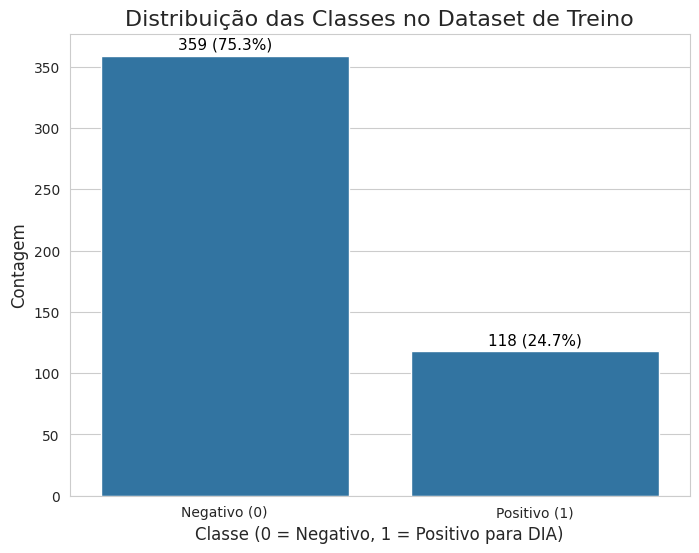

Proporção de classes negativas (treino): 75.26%
Proporção de classes positivas (treino): 24.74%

--- Análise da Distribuição das Classes (Validação/Teste) ---


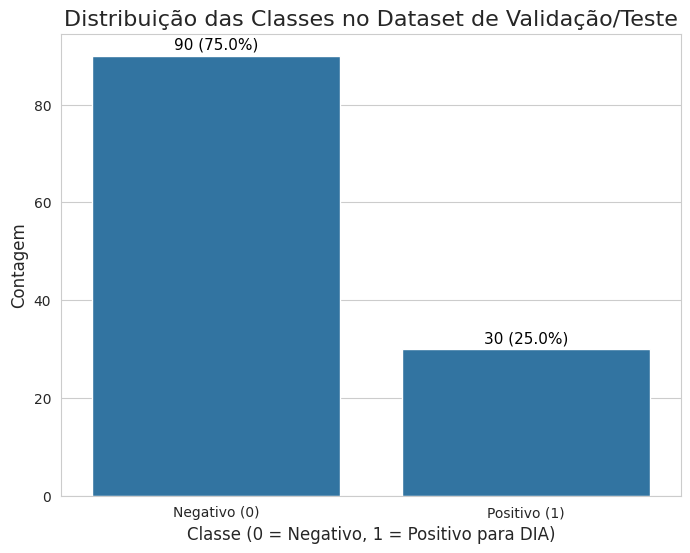

Proporção de classes negativas (validação/teste): 75.00%
Proporção de classes positivas (validação/teste): 25.00%


In [8]:
print("\n--- Análise da Distribuição das Classes (Treino) ---")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Label', data=df_train)
plt.title('Distribuição das Classes no Dataset de Treino', fontsize=16)
plt.xlabel('Classe (0 = Negativo, 1 = Positivo para DIA)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Negativo (0)', 'Positivo (1)'])

class_counts = df_train['Label'].value_counts()
total = len(df_train)
percent_neg = class_counts[0] / total * 100
percent_pos = class_counts[1] / total * 100

for p in ax.patches:
    count = int(p.get_height())
    percent = percent_neg if p.get_x() < 0.5 else percent_pos
    ax.annotate(f'{count} ({percent:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                textcoords='offset points')
plt.show()

print(f"Proporção de classes negativas (treino): {percent_neg:.2f}%")
print(f"Proporção de classes positivas (treino): {percent_pos:.2f}%")

print("\n--- Análise da Distribuição das Classes (Validação/Teste) ---")
plt.figure(figsize=(8, 6))
ax2 = sns.countplot(x='Label', data=df_test)
plt.title('Distribuição das Classes no Dataset de Validação/Teste', fontsize=16)
plt.xlabel('Classe (0 = Negativo, 1 = Positivo para DIA)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Negativo (0)', 'Positivo (1)'])

class_counts_test = df_test['Label'].value_counts()
total_test = len(df_test)
percent_neg_test = class_counts_test[0] / total_test * 100
percent_pos_test = class_counts_test[1] / total_test * 100

for p in ax2.patches:
    count = int(p.get_height())
    percent = percent_neg_test if p.get_x() < 0.5 else percent_pos_test
    ax2.annotate(f'{count} ({percent:.1f}%)', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                 textcoords='offset points')
plt.show()

print(f"Proporção de classes negativas (validação/teste): {percent_neg_test:.2f}%")
print(f"Proporção de classes positivas (validação/teste): {percent_pos_test:.2f}%")

Conclusão: O dataset é significativamente desbalanceado

Analisando as features numéricas e suas correlações

In [9]:
print("\n--- Análise de Correlação entre Features ---")
# Separando as features da variável alvo e do identificador
features = df_train.drop(columns=['Label'])

# Calcular a matriz de correlação
corr_matrix = features.corr().abs()

# Selecionar o triângulo superior da matriz de correlação
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar features com correlação maior que 0.95
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print(f"Encontradas {len(high_corr_features)} features com correlação maior que 0.95 com pelo menos uma outra feature.")
if high_corr_features:
    print("\nFeatures altamente correlacionadas:")
    for feature in high_corr_features: # [:5]: # Mostrando as 5 primeiras
        correlated_with = upper_tri[feature][upper_tri[feature] > 0.95].index.tolist()
        print(f"- '{feature}' é altamente correlacionada com: {correlated_with}")




--- Análise de Correlação entre Features ---
Encontradas 31 features com correlação maior que 0.95 com pelo menos uma outra feature.

Features altamente correlacionadas:
- 'Chi0n' é altamente correlacionada com: ['Chi0']
- 'Chi0v' é altamente correlacionada com: ['Chi0', 'Chi0n']
- 'Chi1' é altamente correlacionada com: ['Chi0', 'Chi0n', 'Chi0v']
- 'Chi1n' é altamente correlacionada com: ['Chi0', 'Chi0n', 'Chi0v', 'Chi1']
- 'Chi1v' é altamente correlacionada com: ['Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n']
- 'Chi2n' é altamente correlacionada com: ['Chi0n', 'Chi1n']
- 'Chi2v' é altamente correlacionada com: ['Chi0v', 'Chi1v', 'Chi2n']
- 'Chi3n' é altamente correlacionada com: ['Chi2n']
- 'Chi3v' é altamente correlacionada com: ['Chi2v']
- 'Chi4n' é altamente correlacionada com: ['Chi3n']
- 'Chi4v' é altamente correlacionada com: ['Chi3v']
- 'ExactMolWt' é altamente correlacionada com: ['Chi0', 'Chi0v', 'Chi1', 'Chi1v']
- 'HeavyAtomCount' é altamente correlacionada com: ['Chi0', 'Chi0n


Visualizando heatmap de correlação para as primeiras 20 features...


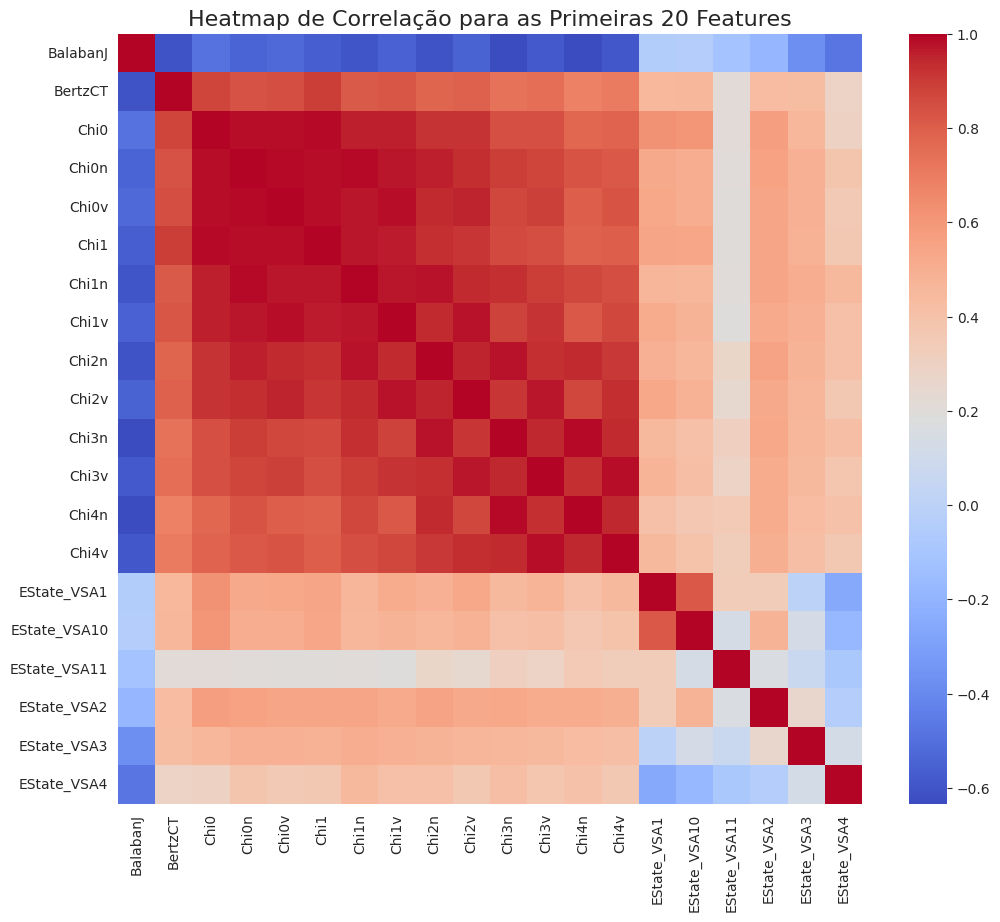

In [10]:
print("\nVisualizando heatmap de correlação para as primeiras 20 features...")
plt.figure(figsize=(12, 10))
sns.heatmap(features.iloc[:, :20].corr(), cmap='coolwarm')
plt.title('Heatmap de Correlação para as Primeiras 20 Features', fontsize=16)
plt.show()

Conclusão: Alta redundância entre features, indicando necessidade de seleção de features.

In [11]:
print("\n--- Análise de Correlação das Features com o Label ---")

# Calcular correlação entre todas as features e o Label
target_correlation = features.corrwith(df_train['Label']).abs().sort_values(ascending=False)

# Remover valores NaN se existirem
target_correlation = target_correlation.dropna()

print(f"Top 20 features mais correlacionadas com o Label:")
display(target_correlation.head(20))




--- Análise de Correlação das Features com o Label ---
Top 20 features mais correlacionadas com o Label:


fr_aniline                 0.231710
fr_ArN                     0.183304
SlogP_VSA10                0.156914
fr_amide                   0.154775
fr_priamide                0.150520
NumSaturatedCarbocycles    0.137020
fr_para_hydroxylation      0.129046
FractionCSP3               0.125686
fr_NH2                     0.125090
NumAliphaticCarbocycles    0.119970
fr_C_O                     0.113722
NHOHCount                  0.109962
PEOE_VSA12                 0.109472
fr_Ar_NH                   0.106575
fr_Nhpyrrole               0.106575
PEOE_VSA6                  0.104322
MinPartialCharge           0.103390
PEOE_VSA8                  0.101901
NumSaturatedRings          0.100297
SMR_VSA9                   0.100140
dtype: float64

Vamos agora agrupar as features com alta correlação entre si para eleger uma delas e eliminar a outra evitando muita colinearidade que pode atrapalhar alguns modelos.

In [12]:
import networkx as nx

# Criar um grafo para identificar grupos de features altamente correlacionadas
G = nx.Graph()

# Adicionar arestas entre features com correlação > 0.95
for i in range(len(upper_tri.columns)):
    for j in range(i+1, len(upper_tri.columns)):
        feature1 = upper_tri.columns[i]
        feature2 = upper_tri.columns[j]
        corr_value = upper_tri.iloc[i, j]
        if not pd.isna(corr_value) and corr_value > 0.95:
            G.add_edge(feature1, feature2, weight=corr_value)

# Encontrar componentes conectados (grupos de features correlacionadas)
correlation_clusters = list(nx.connected_components(G))

print(f"Encontrados {len(correlation_clusters)} grupos de features altamente correlacionadas:\n")

for i, cluster in enumerate(correlation_clusters, 1):
    if len(cluster) > 1:  # Só mostramos clusters com mais de 1 feature
        print(f"Cluster {i} ({len(cluster)} features):")
        for feature in sorted(cluster):
            print(f"  - {feature}")
        print()

# Features únicas que devemos manter (uma de cada cluster)
features_to_keep = []
features_to_remove = []

for cluster in correlation_clusters:
    cluster_list = list(cluster)
    if len(cluster_list) > 1:
        # Manter a primeira feature do cluster (ou podemos escolher por outro critério)
        features_to_keep.append(cluster_list[0])
        features_to_remove.extend(cluster_list[1:])
    else:
        features_to_keep.append(cluster_list[0])

print(f"\nResumo da análise de correlação:")
print(f"- Total de features analisadas: {len(features.columns)}")
print(f"- Features para manter: {len(features_to_keep)}")
print(f"- Features para remover (redundantes): {len(features_to_remove)}")
print(f"\nFeatures para remover:")
for feature in features_to_remove:
    print(f"  - {feature}")

print(f"\nFeatures para manter:")
for feature in features_to_keep:
    print(f"  - {feature}")

Encontrados 12 grupos de features altamente correlacionadas:

Cluster 1 (20 features):
  - Chi0
  - Chi0n
  - Chi0v
  - Chi1
  - Chi1n
  - Chi1v
  - Chi2n
  - Chi2v
  - Chi3n
  - Chi3v
  - Chi4n
  - Chi4v
  - ExactMolWt
  - HeavyAtomCount
  - HeavyAtomMolWt
  - Kappa1
  - LabuteASA
  - MolMR
  - MolWt
  - NumValenceElectrons

Cluster 2 (2 features):
  - MaxAbsEStateIndex
  - MaxEStateIndex

Cluster 3 (2 features):
  - MaxAbsPartialCharge
  - MinPartialCharge

Cluster 4 (2 features):
  - MaxPartialCharge
  - MinAbsPartialCharge

Cluster 5 (2 features):
  - NHOHCount
  - NumHDonors

Cluster 6 (2 features):
  - NOCount
  - TPSA

Cluster 7 (2 features):
  - NumAromaticCarbocycles
  - fr_benzene

Cluster 8 (2 features):
  - SMR_VSA2
  - fr_nitrile

Cluster 9 (2 features):
  - fr_Al_OH
  - fr_Al_OH_noTert

Cluster 10 (2 features):
  - fr_Ar_NH
  - fr_Nhpyrrole

Cluster 11 (3 features):
  - fr_Ar_OH
  - fr_phenol
  - fr_phenol_noOrthoHbond

Cluster 12 (2 features):
  - fr_COO
  - fr_COO2


Re

Vamos eliminar as features desnecessárias, já que manteremos as features que teoricamente representam a mesma informação (pela alta correlação linear)

In [13]:

print("df_train.shape antes:", df_train.shape)
df_train.drop(features_to_remove,axis=1, inplace=True)
print("df_train.shape depois:", df_train.shape)


print("df_test.shape antes:", df_test.shape)
df_test.drop(features_to_remove,axis=1, inplace=True)
print("df_test.shape depois:", df_test.shape)

df_train.shape antes: (477, 180)
df_train.shape depois: (477, 149)
df_test.shape antes: (120, 180)
df_test.shape depois: (120, 149)


Agora vamos persistir os conjuntos de features importantes para reutilizar em outros momentos.

In [14]:
df_train.to_csv('1.1.EDA-df_train-cleaned.csv', index=False)
df_test.to_csv('1.1.EDA-df_test-cleaned.csv', index=False)

# Começamos com os tipos de features e acrescentamos as features para remover identificadas pelo agrupamentos daquelas com alta correlação (person>0.95)
dict_summary_types = df_summary_types[['Tipo de Feature','Features']].to_dict(orient='records')
dict_summary_types.append({'Tipo de Feature': 'Remover - Alta Correlação', 'Features': features_to_remove})
df_summary_types_dict = pd.DataFrame(dict_summary_types)
df_summary_types_dict.to_csv('1.1.EDA-df_summary_types.csv', index=False)


In [15]:
df_summary_types_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tipo de Feature  10 non-null     object
 1   Features         10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


Visualização com redução de dimensionalidade (PCA, t-SNE)

PCA


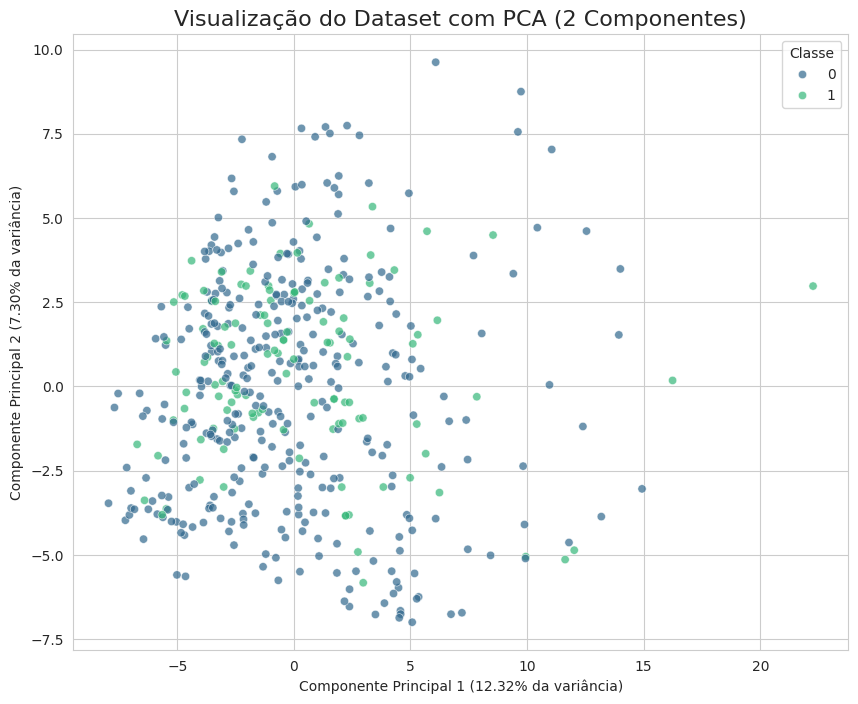

In [16]:
# Preparando os dados
X = df_train.copy()
y = df_train['Label']

# Escalonando as features (essencial para PCA e t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Análise de PCA ---
print("PCA")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Label'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Label', data=df_pca, palette='viridis', alpha=0.7)
plt.title('Visualização do Dataset com PCA (2 Componentes)', fontsize=16)
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.2%} da variância)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.2%} da variância)')
plt.legend(title='Classe')
plt.show()



t-SNE


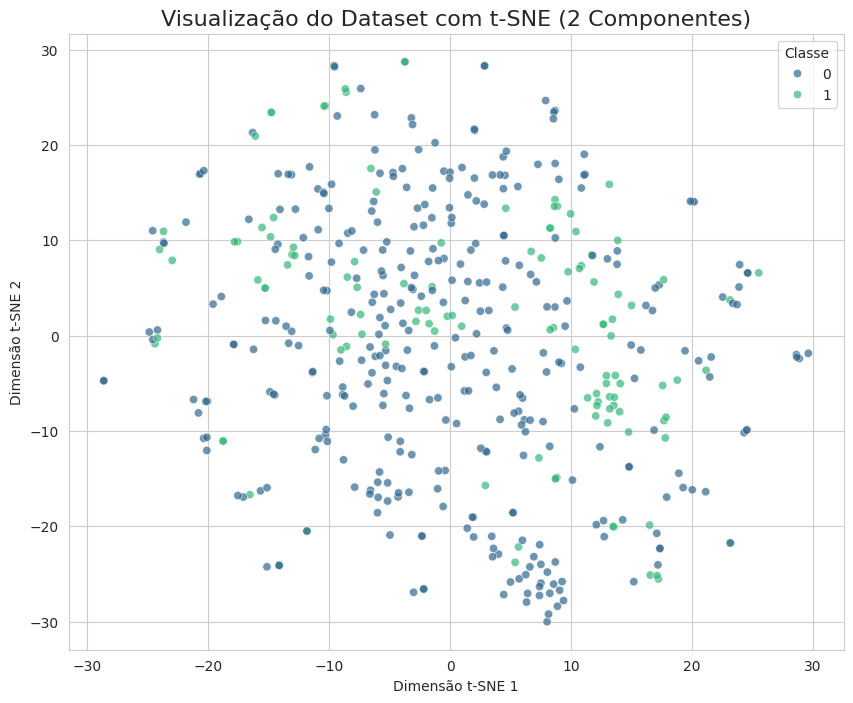

In [17]:
# --- Análise de t-SNE ---
print("\nt-SNE")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dimensão t-SNE 1', 'Dimensão t-SNE 2'])
df_tsne['Label'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimensão t-SNE 1', y='Dimensão t-SNE 2', hue='Label', data=df_tsne, palette='viridis', alpha=0.7)
plt.title('Visualização do Dataset com t-SNE (2 Componentes)', fontsize=16)
plt.xlabel('Dimensão t-SNE 1')
plt.ylabel('Dimensão t-SNE 2')
plt.legend(title='Classe')
plt.show()


Conclusão: As classes não são linearmente separáveis, sugerindo a necessidade de modelos não lineares ou outras técnicas  de classificação.


Vamos treinar um modelo RandomForest puro para verificar a importância das features.

Depois vamos comparar as features de maior importância, com as features com maior correlação linear com a target.

In [18]:

# Fit the model with the correct feature matrix
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Calcular métricas de importância das features
feature_importance = model.feature_importances_
feature_names = X.columns
df_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 50 features mais importantes:")
display(df_importance.head(50))



Top 50 features mais importantes:


,feature,importance
0,Label,0.361618
45,PEOE_VSA2,0.017666
55,SMR_VSA10,0.016271
64,SlogP_VSA10,0.015599
103,fr_aniline,0.014602
51,PEOE_VSA8,0.014521
3,EState_VSA1,0.014295
24,MinEStateIndex,0.012822
22,MaxPartialCharge,0.012762
49,PEOE_VSA6,0.011760


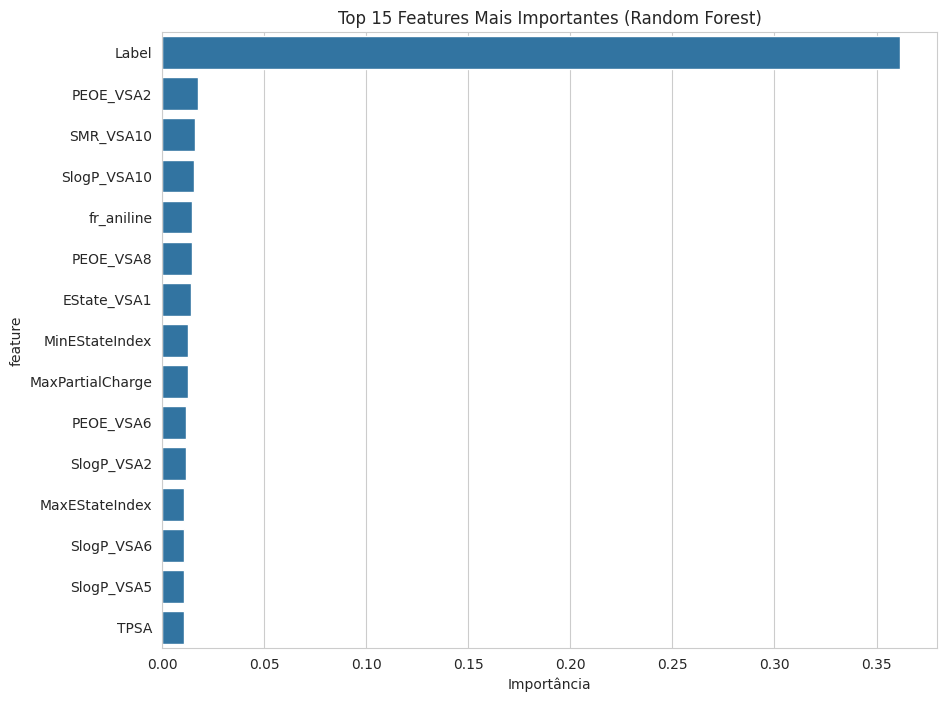

In [19]:
# Plotar as top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(data=df_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância')
plt.show()

In [20]:
n_top = 50
# Intersecção entre target correlaction e importância
intersection = set(target_correlation.head(n_top).index) & set(df_importance.head(n_top)['feature'])
print(f"\nIntersecção entre top {n_top} features por correlação e importância : #{len(intersection)}:\n{intersection}")



Intersecção entre top 50 features por correlação e importância : #19:
{'fr_aniline', 'PEOE_VSA2', 'MaxAbsPartialCharge', 'PEOE_VSA6', 'HallKierAlpha', 'EState_VSA1', 'SlogP_VSA10', 'EState_VSA10', 'PEOE_VSA12', 'fr_amide', 'fr_ArN', 'PEOE_VSA8', 'FractionCSP3', 'SlogP_VSA1', 'fr_NH2', 'EState_VSA4', 'fr_NH1', 'SlogP_VSA4', 'SlogP_VSA6'}


De 50 features com correlação relativamente mais alta em relação à target, 16 também foram identificadas como importantes em um RandomForestClassifier, evidenciando que temos outras relações não lineares importantes.